[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeffereyreng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cosine similarity between "word1" and "word2": 0.9807188


/opt/homebrew/anaconda3/envs/workspace2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Top words per cluster:
Cluster 0: ['heroic', 'virtues', 'african', 'pen', 'norman']
Cluster 1: ['hard', 'where', 'often', 'sleep', 'already']
Cluster 2: ['han', 'nem', 'az', 'hogy', 'και']
Cluster 3: ['bringing', 'played', 'paper', 'health', 'wine']
Cluster 4: ['már', 'király', 'mikor', 'csak', 'én']
PCA plot:


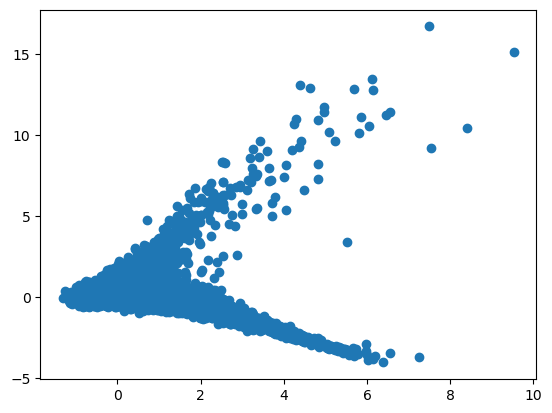

t-SNE plot:


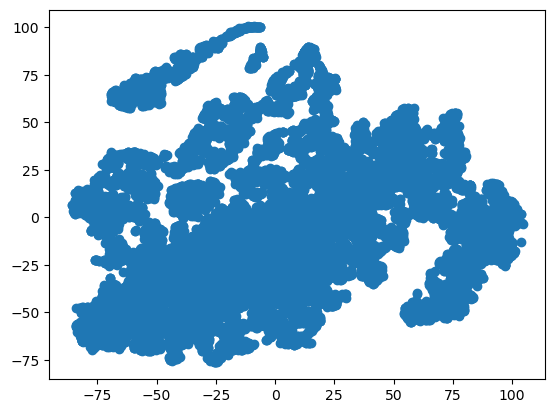

In [8]:
import pandas as pd
import nltk
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/Users/jeffereyreng/Desktop/SI_699/final_project/data/data_w_subj.csv')

# Preprocess the text data
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop_words]))
df['text'] = df['text'].apply(lambda x: ''.join([word for word in x if word.isalnum() or word.isspace()]))

# Build and train the word2vec model
sentences = [text.split() for text in df['text']]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)


# Evaluate the word2vec model
similarity = cosine_similarity([model.wv['history']], [model.wv['age']])
# kmeans = KMeans(n_clusters=5, random_state=42).fit(model.wv.vectors)
# pca = PCA(n_components=2).fit_transform(model.wv.vectors)
# tsne = TSNE(n_components=2, random_state=42).fit_transform(model.wv.vectors)
# similarity
print('Cosine similarity between "word1" and "word2":', similarity[0][0])

kmeans = KMeans(n_clusters=5, random_state=42).fit(model.wv.vectors)
print('Top words per cluster:')
for i, centroid in enumerate(kmeans.cluster_centers_):
    indices = [j for j, x in enumerate(kmeans.labels_) if x == i]
    words = [model.wv.index_to_key[j] for j in indices]
    distances = cosine_similarity([centroid], model.wv[words])
    top_words = [words[j] for j in distances.argsort()[0][::-1][:5]]
    print('Cluster {}: {}'.format(i, top_words))

pca = PCA(n_components=2).fit_transform(model.wv.vectors)
print('PCA plot:')
plt.scatter(pca[:, 0], pca[:, 1])
plt.show()

tsne = TSNE(n_components=2, random_state=42).fit_transform(model.wv.vectors)
print('t-SNE plot:')
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.show()
# Visualize the word embeddings
# TODO: add code for visualization
